In [11]:
%pylab inline

from scipy import special
import numpy as np
from math import factorial
import biff
from octopus import *
from pygadgetreader import *
from weinberg_method import *


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'chararray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

## How well can the SCF method reproduce a triaxial halo?

1. Compute the Snlm, Tnlm coefficients for oblate and prolate halos.
2. Try to determine 

In [3]:
r_s = 40.85

In [4]:
def truncate(pos):
    index_cut = np.where(np.sqrt(pos[:,0]**2.0+pos[:,1]**2.0+pos[:,2]**2.0)<500)[0]
    return pos[index_cut]

In [5]:
MW_sph = readsnap('../../data/MW_models/triaxial/spherical_010', 'pos', 'dm')
MW_oblate12 = readsnap('../../data/MW_models/triaxial/Oblate12_010', 'pos', 'dm')
MW_oblate15 = readsnap('../../data/MW_models/triaxial/Oblate15_010', 'pos', 'dm')
MW_prolate06 = readsnap('../../data/MW_models/triaxial/Prolate06_010', 'pos', 'dm')
MW_prolate08 = readsnap('../../data/MW_models/triaxial/Prolate08_010', 'pos', 'dm')
print(len(MW_prolate08))

500000


In [6]:
MW_sph_t = truncate(MW_sph)
MW_oblate12_t = truncate(MW_oblate12)
MW_oblate15_t = truncate(MW_oblate15)
MW_prolate08_t = truncate(MW_prolate08)
MW_prolate06_t = truncate(MW_prolate06)


print(len(MW_prolate08_t))

391910


In [ ]:
figure(figsize=(16,5))
subplot(1, 3, 1)
title('$Spherical$', fontsize=35)
scatter(MW_sph_t[:,0], MW_sph_t[:,1], s=0.1)
axis('equal')

subplot(1, 3, 2)
title('$Oblate$', fontsize=35)
scatter(MW_oblate15_t[:,0], MW_oblate15_t[:,2], s=0.1)
axis('equal')

subplot(1, 3, 3)
title('$Prolate$', fontsize=35)
scatter(MW_prolate06_t[:,0], MW_prolate06_t[:,2], s=0.1)
axis('equal')


In [8]:
Mass = np.ones(len(MW_sph_t))
print(len(Mass))

398707


In [14]:
Sspheric, Tspheric = biff.compute_coeffs_discrete(MW_sph_t.astype(np.float64), Mass.astype(np.float64), 10, 10, r_s, compute_var=True)
#Soblate12, Toblate12 = biff.compute_coeffs_discrete(MW_oblate12_t, Mass, 10, 10, r_s)
#Soblate15, Toblate15 = STnlm(MW_oblate15_t, Mass, r_s, 10, 10)
#Sprolate06, Tprolate06 = STnlm(MW_prolate06_t, Mass, r_s, 10, 10)
#Sprolate08, Tprolate08 = STnlm(MW_prolate08_t, Mass, r_s, 10, 10)

In [42]:
def b(a, var_a):
    vara = var_a-a**2.0
    b = np.zeros(len(a))
    print(len(b))
    for i in range(len(b)):
        b[i] = 1./(1. + vara[i]/a[i]**2.0)
    return b

In [43]:
S = Sspheric[0].flatten()
Svar = Sspheric[1].flatten()
B_s = b(S, Svar)


1331


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


In [47]:
B_s_m = B_s.reshape([11,11,11])

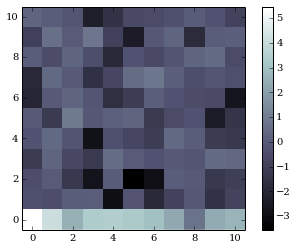

In [57]:
imshow(np.log10(np.abs(B_s_m[:,:,0]).T ), origin='lower', interpolation='None',cmap = plt.cm.bone)
colorbar()

In [ ]:
figure(figsize=(16,4))

#subplot(1, 3, 1)
title('$Spherical$', fontsize=35)
imshow(np.log10(np.abs(Sspheric[:,:,0]).T / np.max(Sspheric[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.bone)#, vmin=-11, vmax=0)
colorbar()
xlabel('$n$', fontsize=35)
ylabel('$l$', fontsize=35)

"""
subplot(1, 3, 2)
title('$Oblate$', fontsize=35)
imshow(np.log10(np.abs(Soblate15[:,:,0]).T / np.nanmax(Soblate15[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.bone, vmin=-11, vmax=0)
colorbar()
xlabel('$n$', fontsize=35)
#ylabel('$l$', fontsize=35)


subplot(1, 3, 3)
title('$Prolate$', fontsize=35)
imshow(np.log10(np.abs(Sprolate06[:,:,0]).T / np.nanmax(Sprolate06[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.bone, vmin=-11, vmax=0)
colorbar()
xlabel('$n$', fontsize=35)
#ylabel('$l$', fontsize=35)

savefig('S_nl_triaxialhalos.png', bbox_inces='tight', dpi=300)

"""


In [ ]:
title('$Spherical$', fontsize=35)
imshow(np.log10(np.abs(Tspheric[:,:,1]).T / np.max(Tspheric[:,:,:])), origin='lower', interpolation='None'
           ,cmap = plt.cm.bone)#, vmin=-11, vmax=0)
colorbar()
xlabel('$n$', fontsize=35)
ylabel('$l$', fontsize=35)

From Weinberg96 Appendix 2.

\begin{equation}
var(\hat{a}_j) = \dfrac{1}{N}(E[\Psi_j \Psi_j] - E[\Psi_j]E[\Psi_j])
\end{equation}

Using Lowing11 notation $\Psi_j$ is defined in 3D as:  

\begin{equation}
\Psi_{S_{n,l,m}} =  m_k \Phi_{n,l}(r_k)Y_{l,m}(\theta_k)cos(m\phi_k)
\end{equation}


\begin{equation}
\Psi_{T_{n,l,m}} =  m_k \Phi_{n,l}(r_k)Y_{l,m}(\theta_k)sin(m\phi_k)
\end{equation}

In [ ]:
Sspheric[0,:,0]

In [ ]:
def phi_nl_f(r, n, l):
    """
    Input:
    ------
    r: S_nlm, T_nlm coefficients.
    n: Array of particles x-coordiante
    l: Array of particles y-coordiante
    Output:
    -------
    phi_nl: A float number with the variance
    of the coefficient (S_nlm, T_nlm)
    """
    factor = r**l * (1.+r)**(-2.*l-1.) * np.sqrt(4.*np.pi)
    s = (r-1.)/(r+1.)
    print(s)
    C_n = special.eval_gegenbauer(n, 2.*l+3./2., s)
    return -factor*C_n.real

def Anl_f(n,l): 
    K_nl = 0.5*n*(n + 4.*l + 3.) + (l + 1.)*(2.*l + 1.)
    factor = 2.**(8.*l + 6.)/(4.*np.pi*K_nl)
    return -factor*factorial(n)*(n + 2*l+ 3./2.)*(special.gamma(2.*l + 3./2.))**2.0/special.gamma(n + 4.*l + 3.)
    

In [ ]:
def coeff_variance(a, x, y, z, mass, n, l, m):
    """
    Input:
    ------
    a: S_nlm, T_nlm coefficients.
    x: Array of particles x-coordiante
    y: Array of particles y-coordiante
    z: Array of particles z-coordinate
    mass: Array with the mass particles
    n: n
    l: l
    m: m
    r_s: halo scale length
    Output:
    -------
    var(a): A float number with the variance
    of the coefficient (S_nlm, T_nlm) evaluated at n,l,m.
    """
    
    r = np.sqrt(x**2.0+y**2.0+z**2.0)/r_s
    N = len(r)
    theta = np.arccos(z/(r*r_s))
    phi = np.arctan2(y,x)
    Y_lm = special.sph_harm(m,l,0,theta) # scipy notation m,l 
    phi_nl = phi_nl_f(r, n, l)
    Psi = phi_nl*Y_lm*mass*np.cos(m*phi)# Multiply by mass etc..
    if m==0:
        dm0=1.0
    else:
        dm0=0.0
    Anl = Anl_f(n,l)
    #print(Anl, phi_nl, Psi.real)
    variance = ((2.-dm0)**2.0*Anl**2.0*np.sum(Psi.real**2.0)) - a**2.0
    S=(2.-dm0)*Anl*np.sum(Psi.real)
    print(S)
    #print(np.sum(Psi**2.0)*(2.-dm0)*Anl)
    print(a)
    return variance# assuming that all particles have the same mass

In [ ]:
var_a = np.zeros(3)
for i in range(1):
    var_a[i] = 1/(1+coeff_variance(Sspheric[i,10,0], MW_sph_t[:,0], MW_sph_t[:,1], MW_sph_t[:,0], Mass/100., i, 0, 0)/Sspheric[i,10,0]**2.0)

In [ ]:
plot(np.abs(var_a[0:]))
#ylim(-40, 10)

In [ ]:
Ssph = Sspheric.flatten()
#Sob12 = Soblate12[:,0,0].flatten()
#Sob15 = Soblate15[:,0,0].flatten()
#Spr06 = Sprolate06[:,0,0].flatten()
#Spr08 = Sprolate08[:,0,0].flatten()

"""
Ssph_l = Sspheric_l.flatten()
Sob12_l = Soblate12_l.flatten()
Sob15_l = Soblate15_l.flatten()
Spr06_l = Sprolate06_l.flatten()
Spr08_l = Sprolate08_l.flatten()
"""
#Ssph_all = Ssph_l.flatten()
#Sob12_all = Soblate12_l.flatten()
#Spr06_all = Sprolate06_l.flatten()



In [ ]:
def S_matrix(a):
    a = a.flatten()
    S = np.zeros((len(a), len(a)))
    for i in range(len(a)):
        for j in range(len(a)):
            S[i][j] = a[i]*a[j]
    return S

# Solving the eigenvalue problem
def T_tranformation(S):
    lambdas, eigenv = linalg.eig(S)
    T = eigenv
    return T, lambdas

# Eq 12 Weinberg 96.
def lambda_prime(lambdas):
    F = np.zeros(len(lambdas))
    print(len(F))
    for i in range(len(F)):
        F[i] = np.sum(lambdas.real[:i])/np.sum(lambdas.real)
    return F

def lambda_prime2(lambdas):
    lambdas_lm = lambdas.real[8::9] # jumping coefficients
    F = np.zeros(len(lambdas_lm))
    print(len(F))
    for i in range(len(F)):
        F[i] = np.sum(lambdas_lm[:i])/np.sum(lambdas.real)
    return F

def a_prime(T, a):
    return np.dot(T.real,a)


def cov_matrix(a):
    cov_m = np.zeros([len(a), len(a)])
    for i in range(len(a)):
        for j in range(len(a)):
            cov_m[i][j] = np.cov((a[i], a[j]))
    return cov_m

def var_aprime(T, cov_a):
    T_daga = np.conjugate(T).T
    var_prime = (np.dot(T, np.dot(cov_a, T_daga)))
    return var_prime.real

In [ ]:
plot(Ssph[0::10]/Ssph[0], marker='o', c='k')
plot(Sspheric[:,0,0]/np.max(Sspheric[:,:,:]), marker='o', c='r')
xlabel('$n$', fontsize=25)
xlim(-0.2 ,11)
#ylim(-0.1 ,1.1)

In [ ]:
Smatrix_sph = S_matrix(Ssph)
Ttrans_sph, l_sph = T_tranformation(Smatrix_sph)
Snlm_star = a_prime(Ttrans_sph, Ssph)

#Smatrix_ob15 = S_matrix(Sob15)
#Ttrans_ob15, l_ob15 = T_tranformation(Smatrix_ob15)
#Snlm_star_ob15 = a_prime(Ttrans_ob15, Sob15)

#Smatrix_pr06 = S_matrix(Spr06)
#Ttrans_pr06, l_pr06 = T_tranformation(Smatrix_pr06)
#Snlm_star_pr06 = a_prime(Ttrans_pr06, Spr06)

In [ ]:
figure(figsize=(17,5))
subplot(1, 3, 1)
title('$Spherical$', fontsize=35)

plot(np.abs(Snlm_star), marker='o', c='k', label='$\mathrm{PCA\ basis}$', lw=1.5)
plot(np.abs(Ssph), marker='o', c='b', ls='--', label='$\mathrm{Biff}$', lw=1.5)
legend()
xlabel('$l$', fontsize=25)
ylabel('$S_{0,l,0}/S_{0,0,0}$', fontsize=25)

#xlim(-0.2 ,11)
#ylim(-0.1 ,1.1)

"""
subplot(1, 3, 2)
title('$Oblate$', fontsize=35)

plot(Snlm_star_ob15/Snlm_star_ob15[0], marker='o', c='k', label='$\mathrm{PCA\ basis}$', lw=1.5)
plot(Sob15/Sob15[0], marker='o', c='b', ls='--',label='$\mathrm{Biff}$', lw=1.5)
#legend()
xlabel('$n$', fontsize=25)
#ylabel('$S_{n,l,m}$', fontsize=25)

xlim(-0.2 ,11)
#ylim(-0.1 ,1.1)


subplot(1, 3, 3)
title('$Prolate$', fontsize=35)

plot(Snlm_star_pr06/Snlm_star_pr06[0], marker='o', c='k', label='$\mathrm{PCA\ basis}$', lw=1.5)
plot(Spr06/Spr06[0], marker='o', c='b', ls='--',label='$\mathrm{Biff}$', lw=1.5)
#legend()
xlabel('$n$', fontsize=25)
xlim(-0.2 ,11)
ylim(-0.1 ,1.1)

savefig('Coefficients_in_PCA_basis.png', bbox_inches='tight', dpi=300)
"""

In [ ]:
x = np.linspace(-500, 500)
y = np.linspace(-500, 500)
z = np.linspace(-500, 500)

xyz = np.array([x,y,z])

In [ ]:
shape(xyz.T)
#biff.density?


In [ ]:
# Density recover.

rho_test = biff.density(np.ascontiguousarray(xyz.T), Sspheric, Tspheric, 1.0, 40.85)

In [ ]:
def plot_density_contours(idx, S, T, grid_max=250., n_grid=300):
    _grid = np.zeros((3,n_grid*n_grid))
    _grid[idx] = np.vstack(map(np.ravel, np.meshgrid(np.linspace(-grid_max,grid_max,n_grid),
                                                     np.linspace(-grid_max,grid_max,n_grid))))

    dens = biff.density(np.ascontiguousarray(_grid.T), S, T, M=1.0, r_s=40.85)
    dens[dens < 0] = np.nan
    
    percs = np.log10([dens[dens > 0].min(), dens[dens > 0].max()])
    levels = np.logspace(percs[0], percs[1], 20)
    
    shp = (n_grid, n_grid)

    fig,ax = subplots(1,1,figsize=(6,6))


    ax.contourf(_grid[idx[0]].reshape(shp), _grid[idx[1]].reshape(shp),
                dens.reshape(shp), cmap='Spectral', levels=levels)

    ax.set_xlim(-grid_max, grid_max)
    ax.set_ylim(-grid_max, grid_max)
    
    ax.set_xlabel("${}$".format('xyz'[idx[0]]))
    ax.set_ylabel("${}$".format('xyz'[idx[1]]))
    
    tmp = np.array([0,1,2])
    tmp = np.delete(tmp, np.where((tmp==idx[0]) | (tmp == idx[1]))[0])
    #ax.set_title("Isodensity contours at ${}=0$".format('xyz'[tmp[0]]))

    fig.tight_layout()
    
    return fig,ax

In [ ]:
new_S = np.zeros([11, 11, 11])
new_T = np.zeros([11, 11, 11])

new_S = copy(Sspheric)
new_T = copy(Tspheric)

new_S[0,0,0] = 0.0
new_T[0,0,0] = 0.0

In [ ]:
fig,ax = plot_density_contours([0,1], new_S, new_T, grid_max=200)

In [ ]:
fig,ax = plot_density_contours([0,1], Sspheric, Tspheric, grid_max=200)